In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/Users/parlorsky/Desktop/study/ML_fu/0.2/v2.xlsx',skiprows=2)

In [ ]:
df = df.iloc[:-1]

In [ ]:
df.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,124.0,11,Ж,341.0,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
1,2.0,128.0,11,Ж,345.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
2,3.0,132.0,11,Ж,340.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
3,4.0,134.0,11,Ж,339.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
4,5.0,136.0,11,Ж,348.0,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0


In [ ]:
for i in [x for x in list(df) if df[x].dtype == float]:
    df[i] = df[i].astype(int)


In [ ]:
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,27
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,27
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,27
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,27


## Сделайте описательную статистику полученных данных.


In [ ]:
df.describe()

,№,№ школы,Номер варианта,Первичный балл,Балл,Минимальный балл
count,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.0
mean,1178.500000,132.005518,338.273769,10.123939,49.255093,27.0
std,680.262939,5.037984,53.660878,3.820484,17.880420,0.0
min,1.000000,121.000000,101.000000,1.000000,5.000000,27.0
25%,589.750000,127.000000,339.000000,7.000000,33.000000,27.0
50%,1178.500000,135.000000,342.500000,10.000000,50.000000,27.0
75%,1767.250000,136.000000,346.000000,13.000000,68.000000,27.0
max,2356.000000,137.000000,506.000000,27.000000,96.000000,27.0


## Найдите процент учащихся, выполнивших работу ниже среднего.


In [ ]:

df[df['Балл'] < df['Балл'].mean()].shape[0]/df.shape[0]*100

48.00509337860781

## Найти процент учащихся не сдавших экзамен.


In [ ]:

df[df['Балл'] < df['Минимальный балл']].shape[0]/df.shape[0]*100

9.210526315789473

In [ ]:
(df['Балл'] < df['Минимальный балл'])

0        True
1        True
2        True
3        True
4        True
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

## Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.


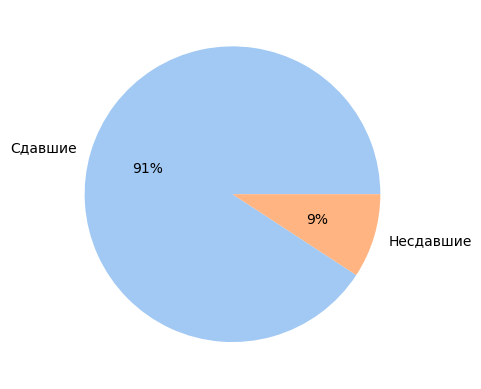

In [ ]:
colors = sns.color_palette('pastel')[:2]

plt.pie(x = (df['Балл'] < df['Минимальный балл']).value_counts(),
             labels = ['Сдавшие', 'Несдавшие'],
             colors = colors,
             autopct='%.0f%%',)
plt.show()


## Постройте ядерную оценку плотности распределению баллов за экзамен.


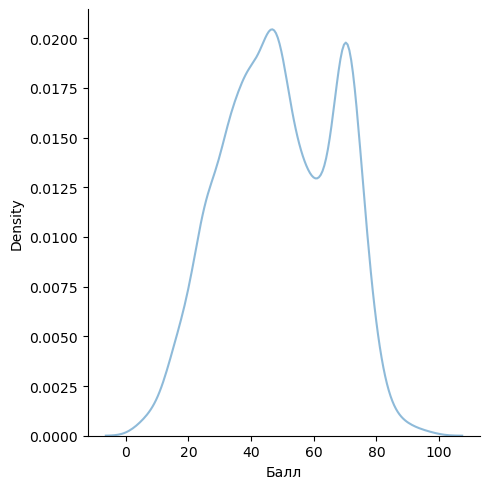

In [ ]:

sns.displot(
    data=df,
    x="Балл",
    kind="kde",  # kde
    alpha=0.5,
);

## Найдите процентное соотношение учащихся,
## сдавших экзамен на «отлично», «хорошо»,
##  «удовлетворительно», «неудовлетворительно».

In [ ]:

def f(x):
    if x < 50: return 'неуд'
    elif 50 <= x < 75: return 'уд'
    elif 75 <= x < 85: return 'хор'
    else: return 'отл'
df['Оценка'] = df['Балл'].apply(lambda x: f(x))

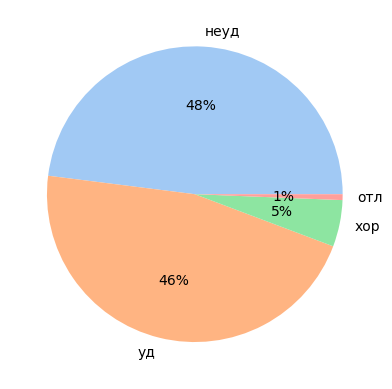

In [ ]:
colors = sns.color_palette('pastel')

plt.pie(x = df['Оценка'].value_counts(),
             labels = ['неуд', 'уд','хор','отл'],
             colors = colors,
             autopct='%.0f%%')
plt.show()

## Какое процентное соотношение юношей и девушек писало данный экзамен?


In [ ]:
df['Пол'].value_counts(normalize=True)*100

Ж    52.843803
М    47.156197
Name: Пол, dtype: float64

In [ ]:
df[~df['Пол'].isin(['М','Ж'])]

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Оценка


## Сколько школ принимало участие в экзамене?


In [ ]:

df.drop_duplicates(subset = '№ школы').shape[0]

17

## Сколько всего заданий с кратким ответом? С развернутым ответом?


In [ ]:

print(f"кол-во заданий с кр. отв. : {len(df['Задания с кратким ответом'].iloc[0])}")
print(f"кол-во заданий с разв. отв. : {df['Задания с развёрнутым ответом'].iloc[0].count('(')}")

кол-во заданий с кр. отв. : 12
кол-во заданий с разв. отв. : 7


## Пусть задания с кратким ответом будут задания типа В.
## Соответственно всего по экзамену вопросов класса В: В, ... Вк
## Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [ ]:


for i in range(12):
    df[f'крз_{i}'] = df['Задания с кратким ответом'].apply(lambda x: 1 if x[i] == '+' else 0)

for i in range(12):
    print(f'Процент выполнения задания c кратким номер {i+1}: ',np.round(100*df[f'крз_{i}'].sum()/df.shape[0],1), '%')



Процент выполнения задания c кратким номер 1:  89.3 %
Процент выполнения задания c кратким номер 2:  95.3 %
Процент выполнения задания c кратким номер 3:  92.8 %
Процент выполнения задания c кратким номер 4:  91.0 %
Процент выполнения задания c кратким номер 5:  88.5 %
Процент выполнения задания c кратким номер 6:  73.2 %
Процент выполнения задания c кратким номер 7:  37.5 %
Процент выполнения задания c кратким номер 8:  47.8 %
Процент выполнения задания c кратким номер 9:  91.9 %
Процент выполнения задания c кратким номер 10:  71.5 %
Процент выполнения задания c кратким номер 11:  59.3 %
Процент выполнения задания c кратким номер 12:  46.2 %


In [ ]:
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,крз_10,крз_11,раз_0,раз_1,раз_2,раз_3,раз_4,раз_5,раз_6,раз_сум
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,...,1,1,1,1,1,1,1,0,1,13
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,...,1,1,1,1,1,1,1,1,1,14
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,...,1,1,1,1,1,1,1,1,1,15
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,...,1,1,1,1,1,0,1,1,1,15


In [ ]:
#Аналогично и с типом С (ответы с развернутым ответом)
for i in range(7):
    df[f'раз_{i}'] = df['Задания с развёрнутым ответом'].apply(lambda x: 1 if x[4*i] != '0' else 0)

for i in range(7):
    print(f'Процент выполнения задания с развёрнутым номер {i+1}: ',np.round(100*df[f'раз_{i}'].sum()/df.shape[0],1), '%')

Процент выполнения задания с развёрнутым номер 1:  33.9 %
Процент выполнения задания с развёрнутым номер 2:  15.9 %
Процент выполнения задания с развёрнутым номер 3:  15.6 %
Процент выполнения задания с развёрнутым номер 4:  2.7 %
Процент выполнения задания с развёрнутым номер 5:  3.4 %
Процент выполнения задания с развёрнутым номер 6:  1.1 %
Процент выполнения задания с развёрнутым номер 7:  3.4 %


In [ ]:
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,крз_10,крз_11,раз_0,раз_1,раз_2,раз_3,раз_4,раз_5,раз_6,раз_сум
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,...,1,1,1,1,1,1,1,0,1,13
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,...,1,1,1,1,1,1,1,1,1,14
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,...,1,1,1,1,1,1,1,1,1,15
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,...,1,1,1,1,1,0,1,1,1,15


## Сделайте анализ по двум школам:

In [ ]:
df['№ школы'].value_counts()

136    1020
135     182
127     176
133     115
128     113
123     111
132     104
137      88
121      81
125      77
126      71
122      54
131      50
124      35
129      33
130      26
134      20
Name: № школы, dtype: int64

In [ ]:
df['раз_сум'] = df['Задания с развёрнутым ответом'].apply(lambda x: sum([int(x[i]) for i in range(0,25,4)]))

In [ ]:
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,крз_10,крз_11,раз_0,раз_1,раз_2,раз_3,раз_4,раз_5,раз_6,раз_сум
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,...,1,1,1,1,1,1,1,0,1,13
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,...,1,1,1,1,1,1,1,1,1,14
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,...,1,1,1,1,1,1,1,1,1,15
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,...,1,1,1,1,1,0,1,1,1,15


In [ ]:
def est(x):
    return np.round(100*x[x > 10].shape[0]/x.shape[0],1)


In [ ]:
#1) по всем выполненным заданиям типа В
#2) по заданиям типа С больше 50%

f_sch = 127
s_sch = 135

da = df[df['№ школы'].isin([f_sch,s_sch])]


da.groupby('№ школы', as_index=False).agg(
    B_0 = ('крз_0', 'sum'),
    B_1 = ('крз_1', 'sum'),
    B_2 = ('крз_2', 'sum'),
    B_3 = ('крз_3', 'sum'),
    B_4 = ('крз_4', 'sum'),
    B_5 = ('крз_5', 'sum'),
    B_6 = ('крз_6', 'sum'),
    B_7 = ('крз_7', 'sum'),
    B_8 = ('крз_8', 'sum'),
    B_9 = ('крз_9', 'sum'),
    B_10 = ('крз_10', 'sum'),
    B_11 = ('крз_11', 'sum'),
    C_gr_50_perc = ('раз_сум', est),
    )

,№ школы,B_0,B_1,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,B_10,B_11,C_gr_50_perc
0,127,158,166,165,167,155,135,67,78,167,136,111,86,0.0
1,135,161,175,167,156,167,131,71,80,163,132,100,78,0.0


In [ ]:
#3) по среднему баллу юношей и девушек

da.pivot_table(
            index = '№ школы',
            columns = ['Пол'],
            values = ['Балл'],
            aggfunc = 'mean',
            )


Балл           
Пол              Ж          М
№ школы                      
127      49.470000  53.315789
135      48.428571  47.040816